In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels

In [2]:
sys.path.insert(0, os.path.split(os.path.abspath(""))[0])
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [3]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from statistics import Statistics as st
from data_engineering import PeriodicDataPreprocess, FeatureEngineering
from statistics import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima import model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf

In [5]:
df = pd.read_csv("POP.csv")

In [6]:
df = df.drop(["realtime_start", "realtime_end"], axis=1)

In [7]:
df

,value,date
0,156309.000,1952-01-01
1,156527.000,1952-02-01
2,156731.000,1952-03-01
3,156943.000,1952-04-01
4,157140.000,1952-05-01
...,...,...
811,329591.333,2019-08-01
812,329785.872,2019-09-01
813,329982.035,2019-10-01
814,330154.949,2019-11-01


In [8]:
df["date"] = pd.to_datetime(df["date"])


<AxesSubplot: xlabel='value', ylabel='Count'>

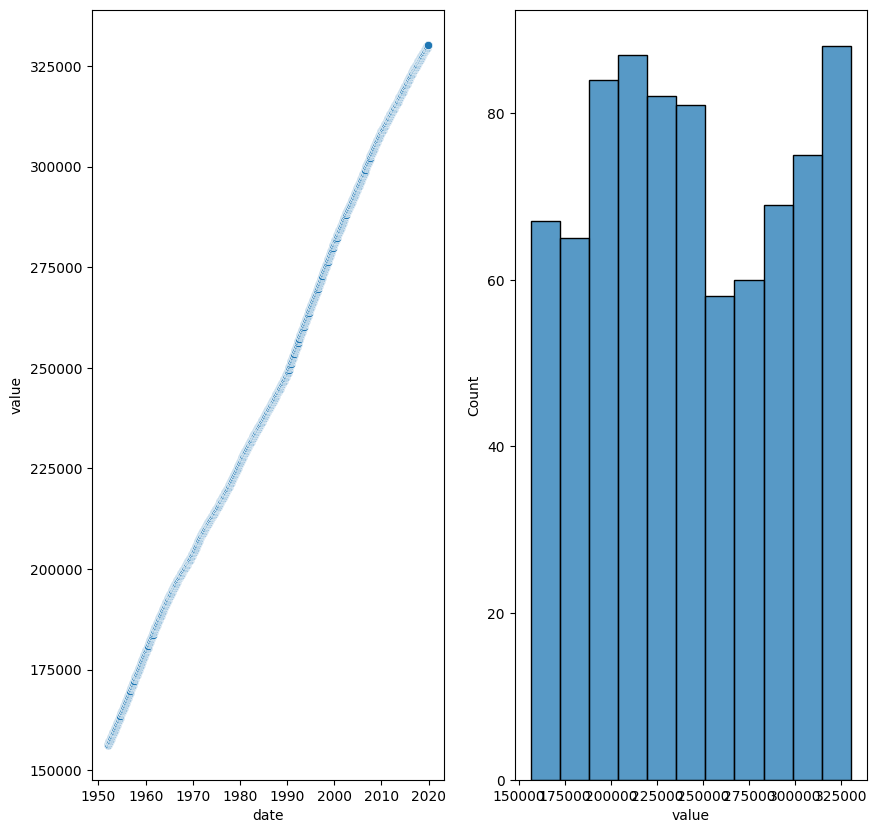

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
sns.scatterplot(x=df["date"], y=df["value"], ax=axs[0])
sns.histplot(df["value"], ax=axs[1])

<AxesSubplot: xlabel='value', ylabel='Count'>

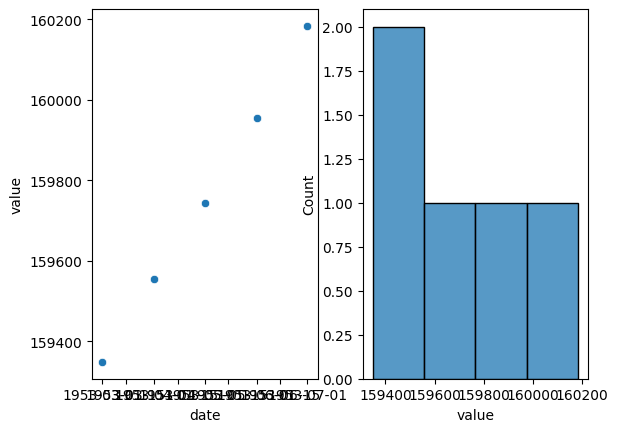

In [45]:
fig, axs = plt.subplots(1,2)
sns.scatterplot(x=df["date"].iloc[:5], y=df["value"].iloc[:5], ax=axs[0])
sns.histplot(df["value"].iloc[:5], ax=axs[1])

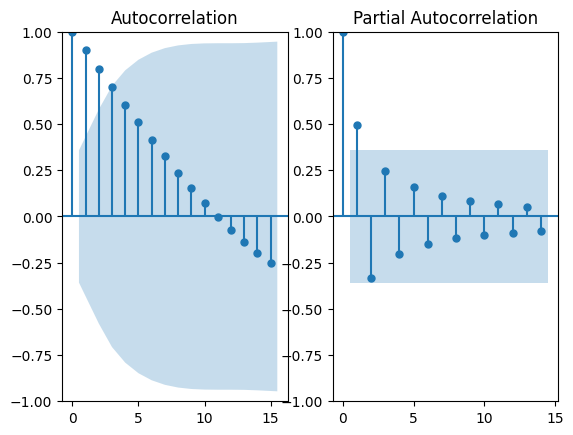

In [11]:
fig, axs = plt.subplots(1,2)
plot_acf(acf(df["value"]), ax=axs[0])
plot_pacf(pacf(df["value"]), lags=14, ax=axs[1])
plt.show()

In [12]:
nonp = NonParametric(data=df["value"])
ts = TimeSeries(data=df["value"])

In [13]:
nonp.run_tests()
ts.run_tests()

Made <NORMALTEST> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ADF> test:
 Fail to reject H0 hypothesis:
 Verdict: There is a unit root in data (non-stationary)
pvalue of test is 0.856

Made <KPSS> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is non-stationary
pvalue of test is 0.010



/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/statistics.py:367: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  st, pvalue, *_ = kpss(self.data)


In [14]:
df["value_diff"] = df["value"].diff()
df["value_diff2"] = df["value"].diff().diff()
df = df.dropna()

<AxesSubplot: xlabel='value_diff2', ylabel='Count'>

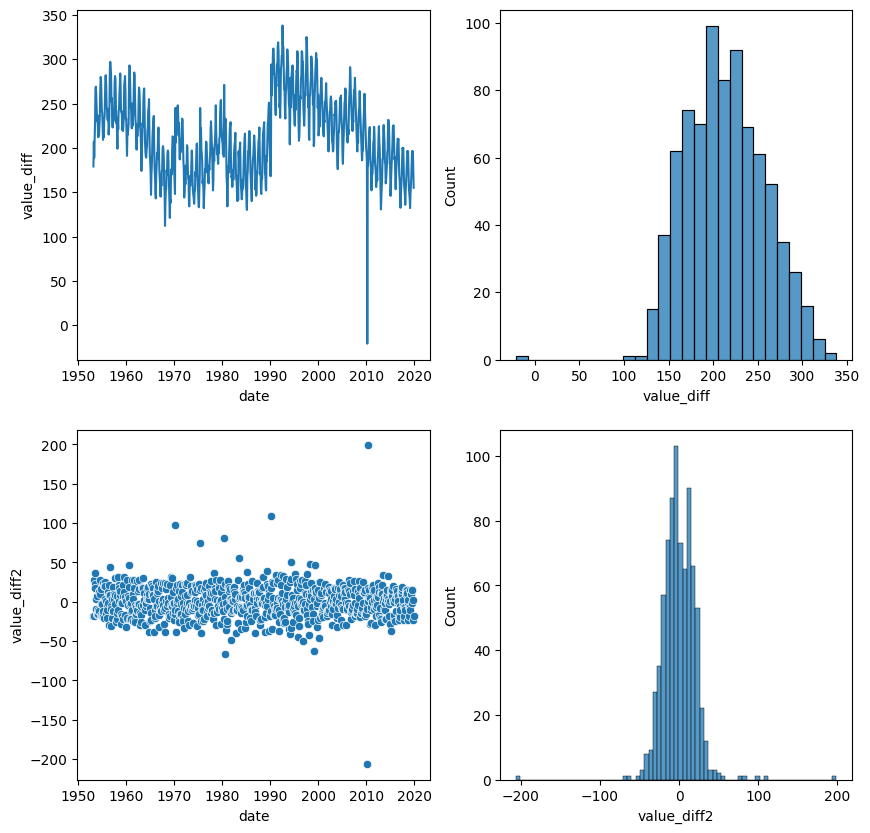

In [46]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.lineplot(x=df["date"], y=df["value_diff"], ax=axs[0][0])
sns.histplot(df["value_diff"], ax=axs[0][1])
sns.scatterplot(x=df["date"], y=df["value_diff2"], ax=axs[1][0])
sns.histplot(df["value_diff2"], ax=axs[1][1])

<AxesSubplot: xlabel='value_diff2', ylabel='Count'>

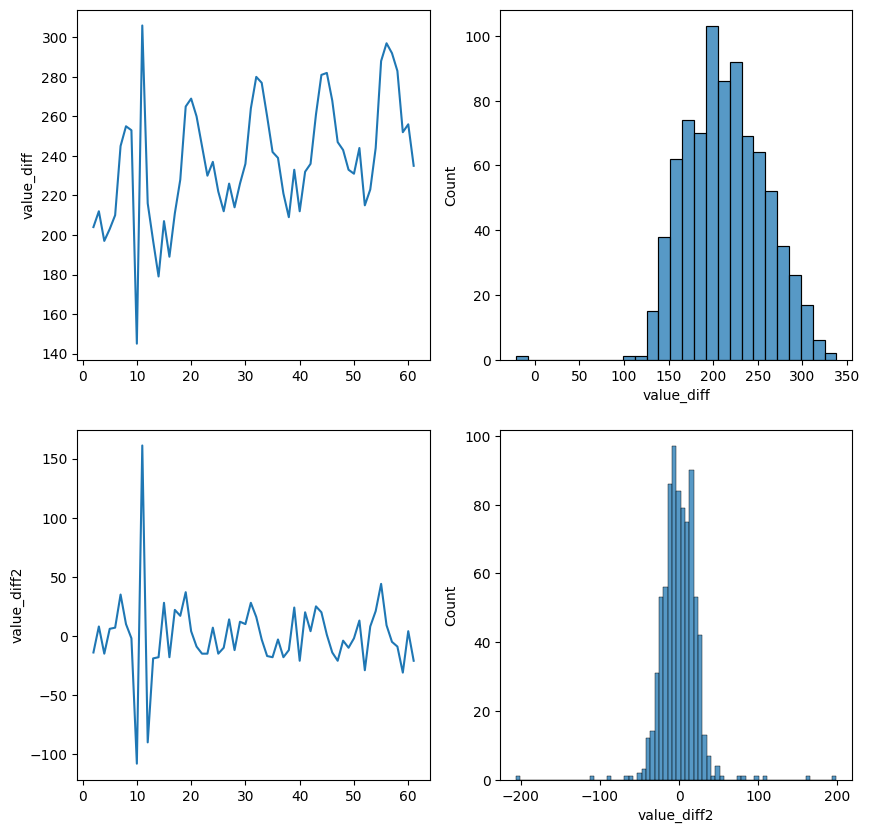

In [16]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.lineplot(x=df.index[:60], y=df["value_diff"][:60], ax=axs[0][0])
sns.histplot(df["value_diff"], ax=axs[0][1])
sns.lineplot(x=df.index[:60], y=df["value_diff2"][:60], ax=axs[1][0])
sns.histplot(df["value_diff2"], ax=axs[1][1])

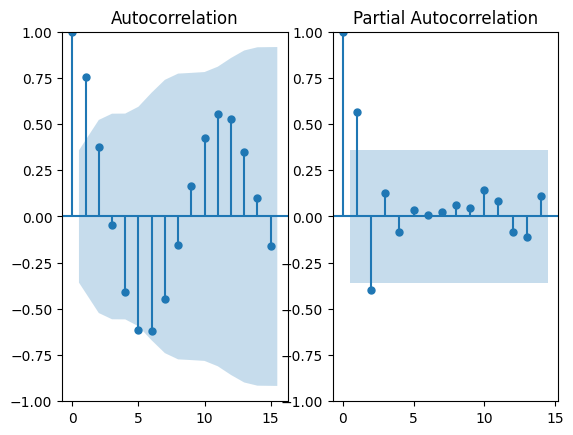

In [17]:
fig, axs = plt.subplots(1,2)
plot_acf(acf(df["value_diff"]), ax=axs[0])
plot_pacf(pacf(df["value_diff"]), lags=14, ax=axs[1])
plt.show()

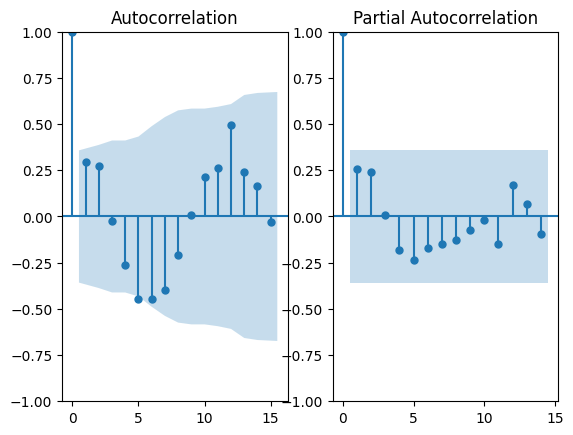

In [18]:
fig, axs = plt.subplots(1,2)
plot_acf(acf(df["value_diff2"]), ax=axs[0])
plot_pacf(pacf(df["value_diff2"]), lags=14, ax=axs[1])
plt.show()

In [19]:
nonp_diff = NonParametric(data=df["value_diff"])
ts_diff = TimeSeries(data=df["value_diff"])

nonp_diff2 = NonParametric(data=df["value_diff2"])
ts_diff2 = TimeSeries(data=df["value_diff2"])

In [20]:
nonp_diff.run_tests()
ts_diff.run_tests()

Made <NORMALTEST> test:
 Fail to reject H0 hypothesis:
 Verdict: The data comes from a specified distribution
pvalue of test is 0.242

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ADF> test:
 Fail to reject H0 hypothesis:
 Verdict: There is a unit root in data (non-stationary)
pvalue of test is 0.309

Made <KPSS> test:
 Fail to reject H0 hypothesis:
 Verdict: The time series is stationary
pvalue of test is 0.080



In [21]:
nonp_diff2.run_tests()
ts_diff2.run_tests()

Made <NORMALTEST> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ADF> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is stationary (or trend-stationary)
pvalue of test is 0.000

Made <KPSS> test:
 Fail to reject H0 hypothesis:
 Verdict: The time series is stationary
pvalue of test is 0.100



/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/statistics.py:367: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  st, pvalue, *_ = kpss(self.data)


In [22]:
df["value_des"] = df["value_diff2"] - df["value_diff2"].shift(12)
df = df.dropna()

/tmp/ipykernel_2284/3891415216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["value_des"] = df["value_diff2"] - df["value_diff2"].shift(12)


In [23]:
nonp_des = NonParametric(data=df["value_des"])
ts_des = TimeSeries(data=df["value_des"])

nonp_des.run_tests()
ts_des.run_tests()

Made <NORMALTEST> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ADF> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is stationary (or trend-stationary)
pvalue of test is 0.000

Made <KPSS> test:
 Fail to reject H0 hypothesis:
 Verdict: The time series is stationary
pvalue of test is 0.100



/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/statistics.py:367: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  st, pvalue, *_ = kpss(self.data)


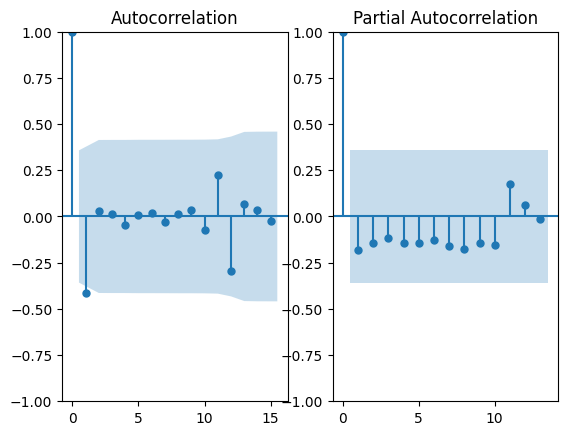

In [24]:
fig, axs = plt.subplots(1,2)
plot_acf(acf(df["value_des"]), ax=axs[0])
plot_pacf(pacf(df["value_des"]), lags=13, ax=axs[1])
plt.show()

In [25]:
train_ind = int(len(df["value"])*0.8)
test_ind = len(df["value"])

In [26]:
train, test = df["value"].iloc[:train_ind], df["value"].iloc[train_ind:] 

In [27]:
arima = model.ARIMA(train, order=(1,1,2), seasonal_order=(1,1,1,12)).fit()
# arima = model.ARIMA(train, order=(1,1,2), seasonal_order=(0,0,0,0)).fit()

/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  641
Model:             ARIMA(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -2429.907
Date:                            Wed, 28 Jun 2023   AIC                           4871.815
Time:                                    16:26:53   BIC                           4898.470
Sample:                                         0   HQIC                          4882.170
                                            - 641                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9795      0.009    113.304      0.000       0.963       0.996
ma.L1         -0.3967      0.031    -12.801      0.000      -0.457      -0.336
ma.L2         -0.1205      0.035     -3.478      0.001      -0.188      -0.053
ar.S.L12       0.1088      0.043      2.513      0.012       0.024       0.194
ma.S.L12      -0.8733      0.028    -31.516      0.000      -0.928      -0.819
sigma2       126.7807      2.753     46.054      0.000     121.385     132.176
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              3635.56
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             1.67
Prob(H) (two-sided):                  0.13   Kurtosis:                        14.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
pred = arima.predict(start=len(train), end=len(train) + len(test) - 1)

/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot: ylabel='value'>

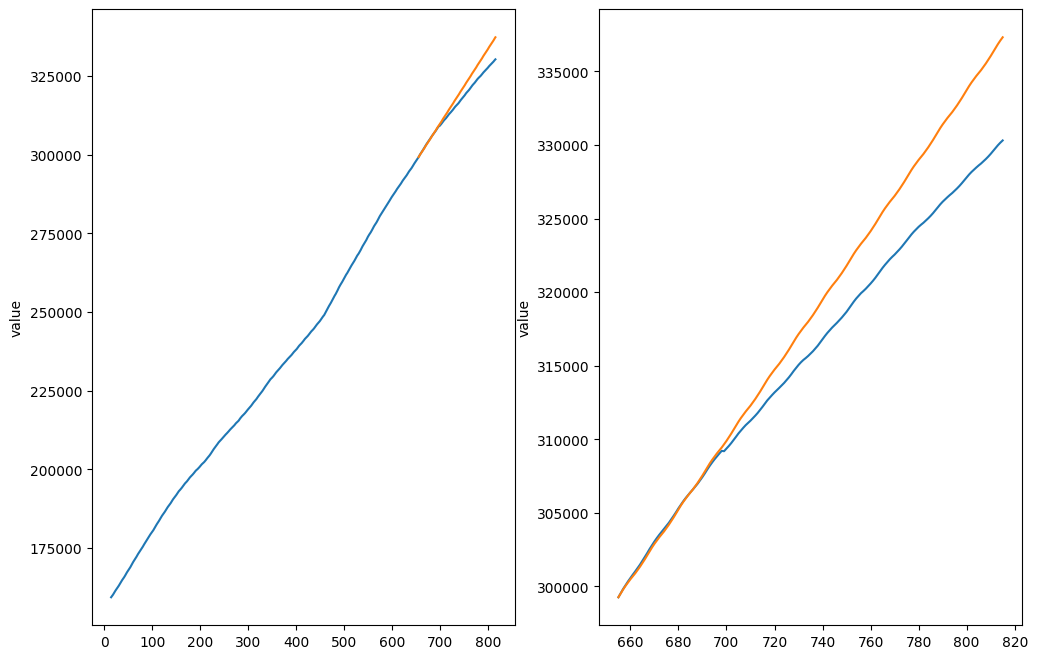

In [30]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
sns.lineplot(x=df.index, y=df["value"], ax=axs[0])
sns.lineplot(x=test.index, y=pred, ax=axs[0])

sns.lineplot(x=test.index, y=test, ax=axs[1])
sns.lineplot(x=test.index, y=pred, ax=axs[1])

In [164]:
last_obs = 500

In [165]:
obs = df.iloc[-last_obs:]

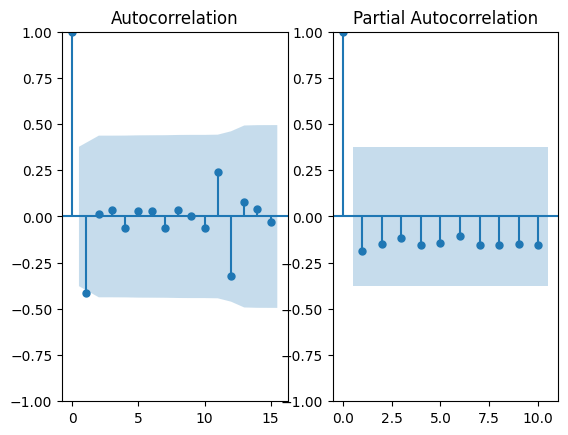

In [166]:
fig, axs = plt.subplots(1,2)
plot_acf(acf(obs["value_des"]), ax=axs[0])
plot_pacf(pacf(obs["value_des"]), lags=10, ax=axs[1])
plt.show()

In [167]:
train_ind_short = int(len(obs)*0.8)
test_ind_short = len(obs)

In [168]:
train_short, test_short = obs["value"].iloc[:train_ind_short], obs["value"].iloc[train_ind_short:] 

In [177]:
arima_short = model.ARIMA(train_short, order=(1,1,4), seasonal_order=(1,1,1,12)).fit()
# arima = model.ARIMA(train, order=(1,1,2), seasonal_order=(0,0,0,0)).fit()

/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [178]:
arima_short.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  400
Model:             ARIMA(1, 1, 4)x(1, 1, [1], 12)   Log Likelihood               -1655.401
Date:                            Wed, 28 Jun 2023   AIC                           3326.802
Time:                                    18:06:08   BIC                           3358.469
Sample:                                         0   HQIC                          3339.359
                                            - 400                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9818      0.018     55.016      0.000       0.947       1.017
ma.L1         -0.6786      0.031    -21.800      0.000      -0.740      -0.618
ma.L2          0.0023      0.063      0.036      0.971      -0.121       0.125
ma.L3         -0.0003      0.076     -0.004      0.997      -0.149       0.148
ma.L4         -0.0141      0.066     -0.212      0.832      -0.144       0.116
ar.S.L12      -0.0301      0.076     -0.397      0.691      -0.178       0.118
ma.S.L12      -0.7780      0.069    -11.348      0.000      -0.912      -0.644
sigma2       268.9568      5.079     52.950      0.000     259.001     278.912
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):             97123.68
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -5.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        79.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
pred_short = arima_short.predict(start=len(train_short), end= (len(train_short) + len(test_short) - 1))

/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot: ylabel='value'>

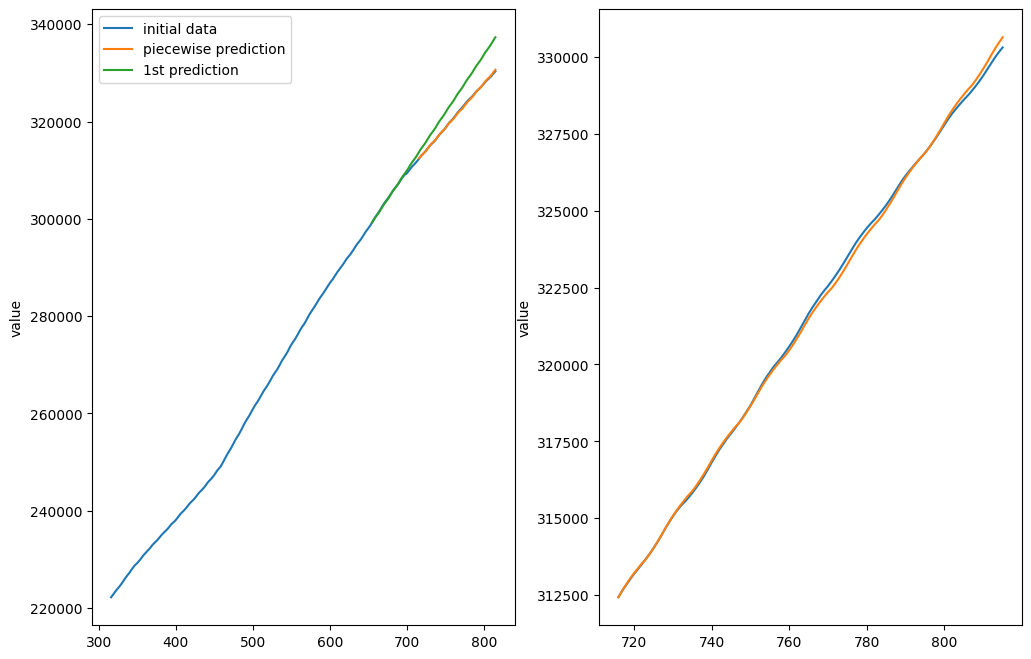

In [180]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
sns.lineplot(x=obs.index, y=obs["value"], ax=axs[0], label="initial data")
sns.lineplot(x=test_short.index, y=pred_short, ax=axs[0], label="piecewise prediction")
sns.lineplot(x=test.index, y=pred, ax=axs[0], label="1st prediction")

sns.lineplot(x=test_short.index, y=test_short, ax=axs[1])
sns.lineplot(x=test_short.index, y=pred_short, ax=axs[1])


In [181]:
arima_short.resid

316    222176.000000
317       176.120541
318       181.583250
319       198.163135
320       229.203274
           ...      
711        41.460983
712        -9.081404
713       -12.693464
714         1.073340
715        -7.196801
Length: 400, dtype: float64

In [192]:
res = arima_short.resid[(arima_short.resid < 20) & (arima_short.resid > -20)]

<AxesSubplot: >

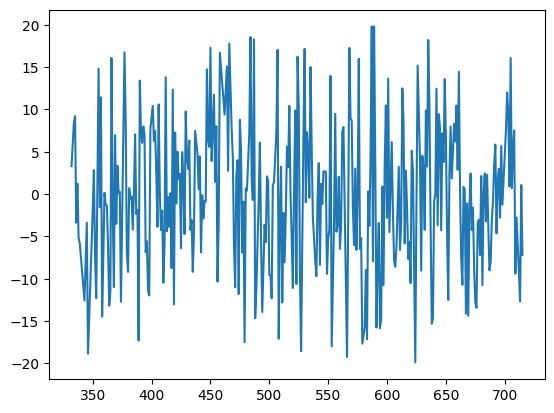

In [193]:
sns.lineplot(res)

<AxesSubplot: ylabel='Count'>

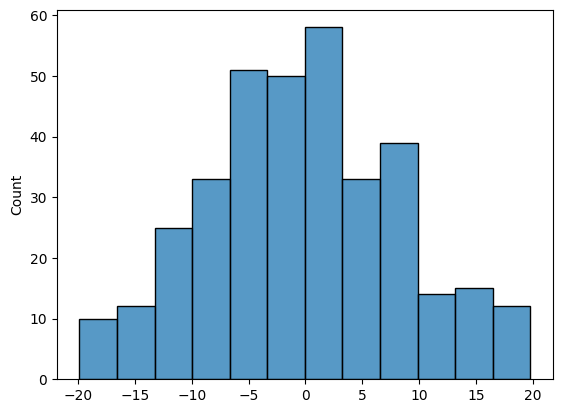

In [194]:
sns.histplot(res)

In [195]:
np_res = NonParametric(data=res)

In [196]:
np_res.run_tests()

Made <NORMALTEST> test:
 Fail to reject H0 hypothesis:
 Verdict: The data comes from a specified distribution
pvalue of test is 0.139

Made <SHAPIRO> test:
 Fail to reject H0 hypothesis:
 Verdict: The data comes from a specified distribution
pvalue of test is 0.091

Made <ANDERSON> test:
 Fail to reject H0 hypothesis:
 Verdict: The data comes from a specified distribution
pvalue of test is 0.612

